In [41]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [42]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [43]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [44]:
df['Attrition'].value_counts() # the data is imbalanced

Attrition
No     1233
Yes     237
Name: count, dtype: int64

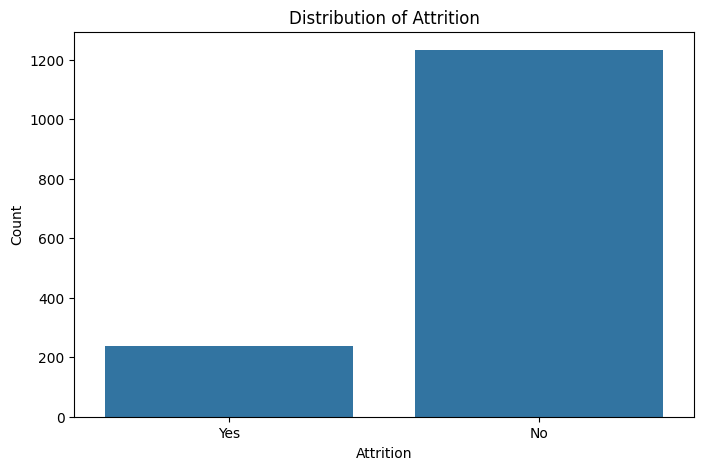

In [45]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Attrition', data=df)
plt.title('Distribution of Attrition')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

In [46]:
pd.set_option('display.max_columns',None) # for displaying all the expand columns data 

In [47]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [48]:
df_num = df.select_dtypes(include=['number'])

In [49]:
df_num

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,4,2571,12290,4,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,613,6,1,1,2062,4,42,2,3,1,9991,21457,4,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,155,4,3,1,2064,2,87,4,2,2,6142,5174,1,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,1023,2,3,1,2065,4,63,2,2,2,5390,13243,2,14,3,4,80,0,17,3,2,9,6,0,8


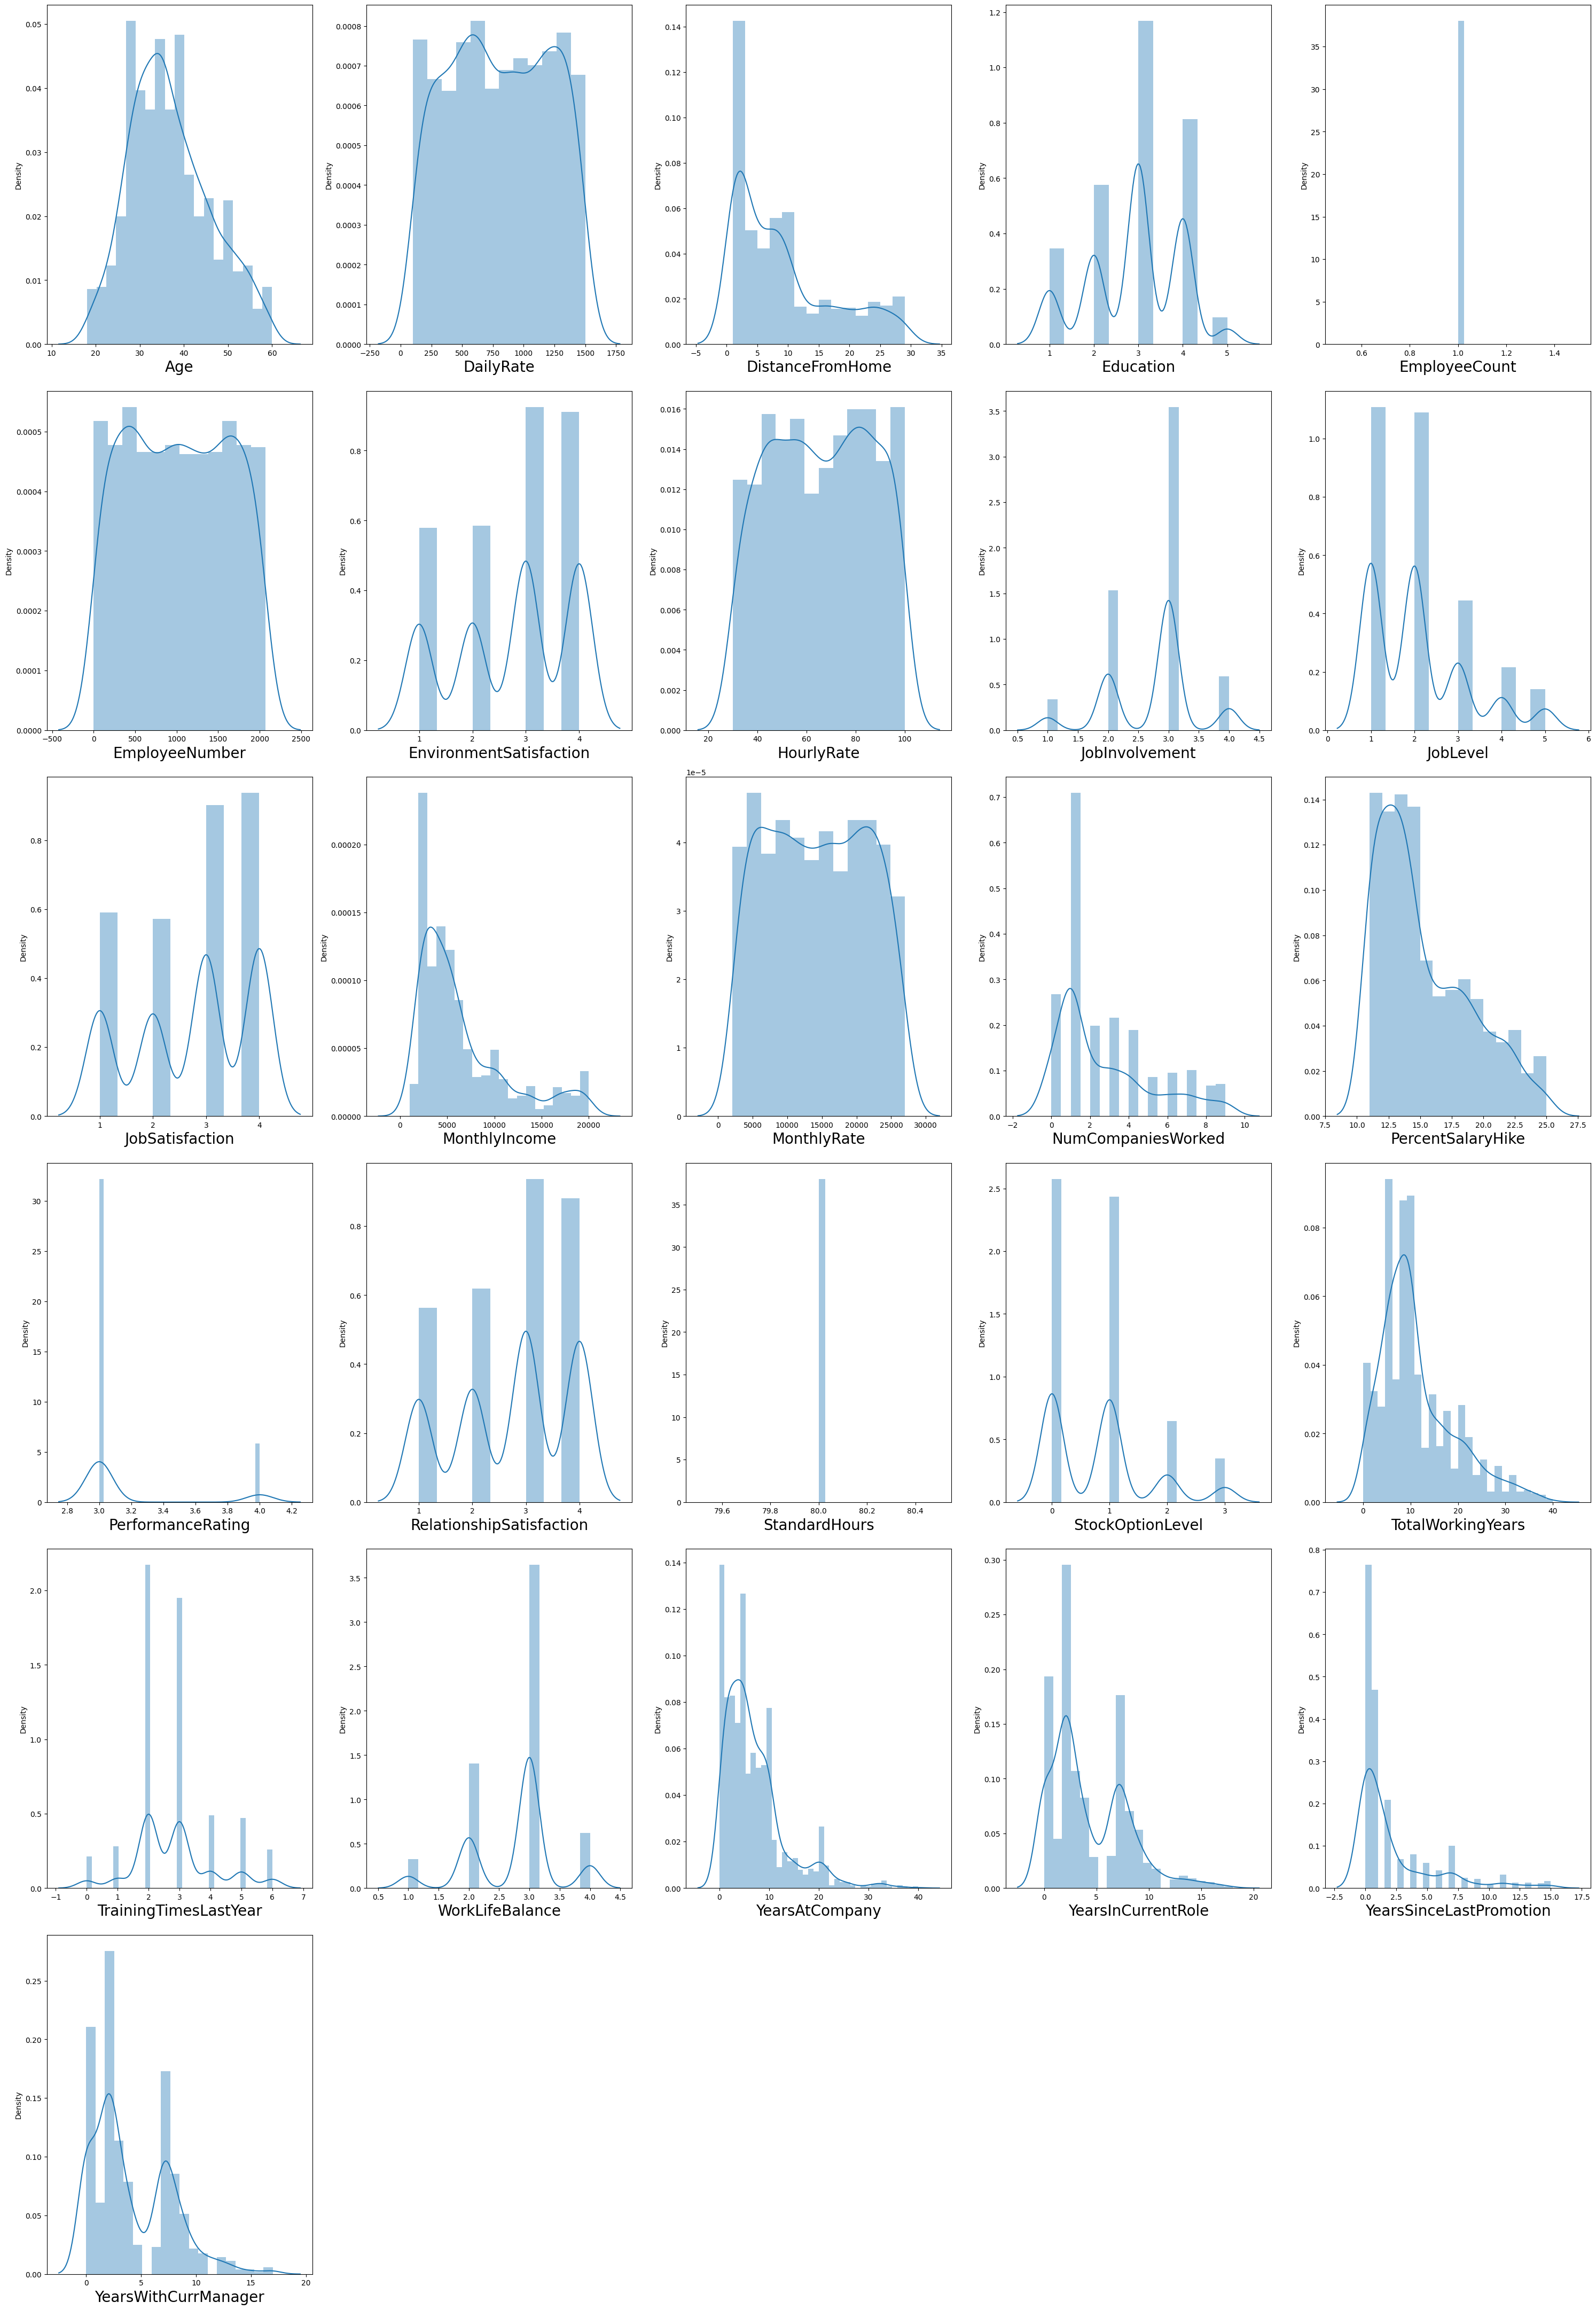

In [50]:
plt.figure(figsize=(30,50))
plot = 1

for column in df_num:
    if plot <= 35:
        ax = plt.subplot(7,5,plot)
        sns.distplot(df_num[column])
        plt.xlabel(column,fontsize=20)
    
    plot += 1

plt.tight_layout()

In [51]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


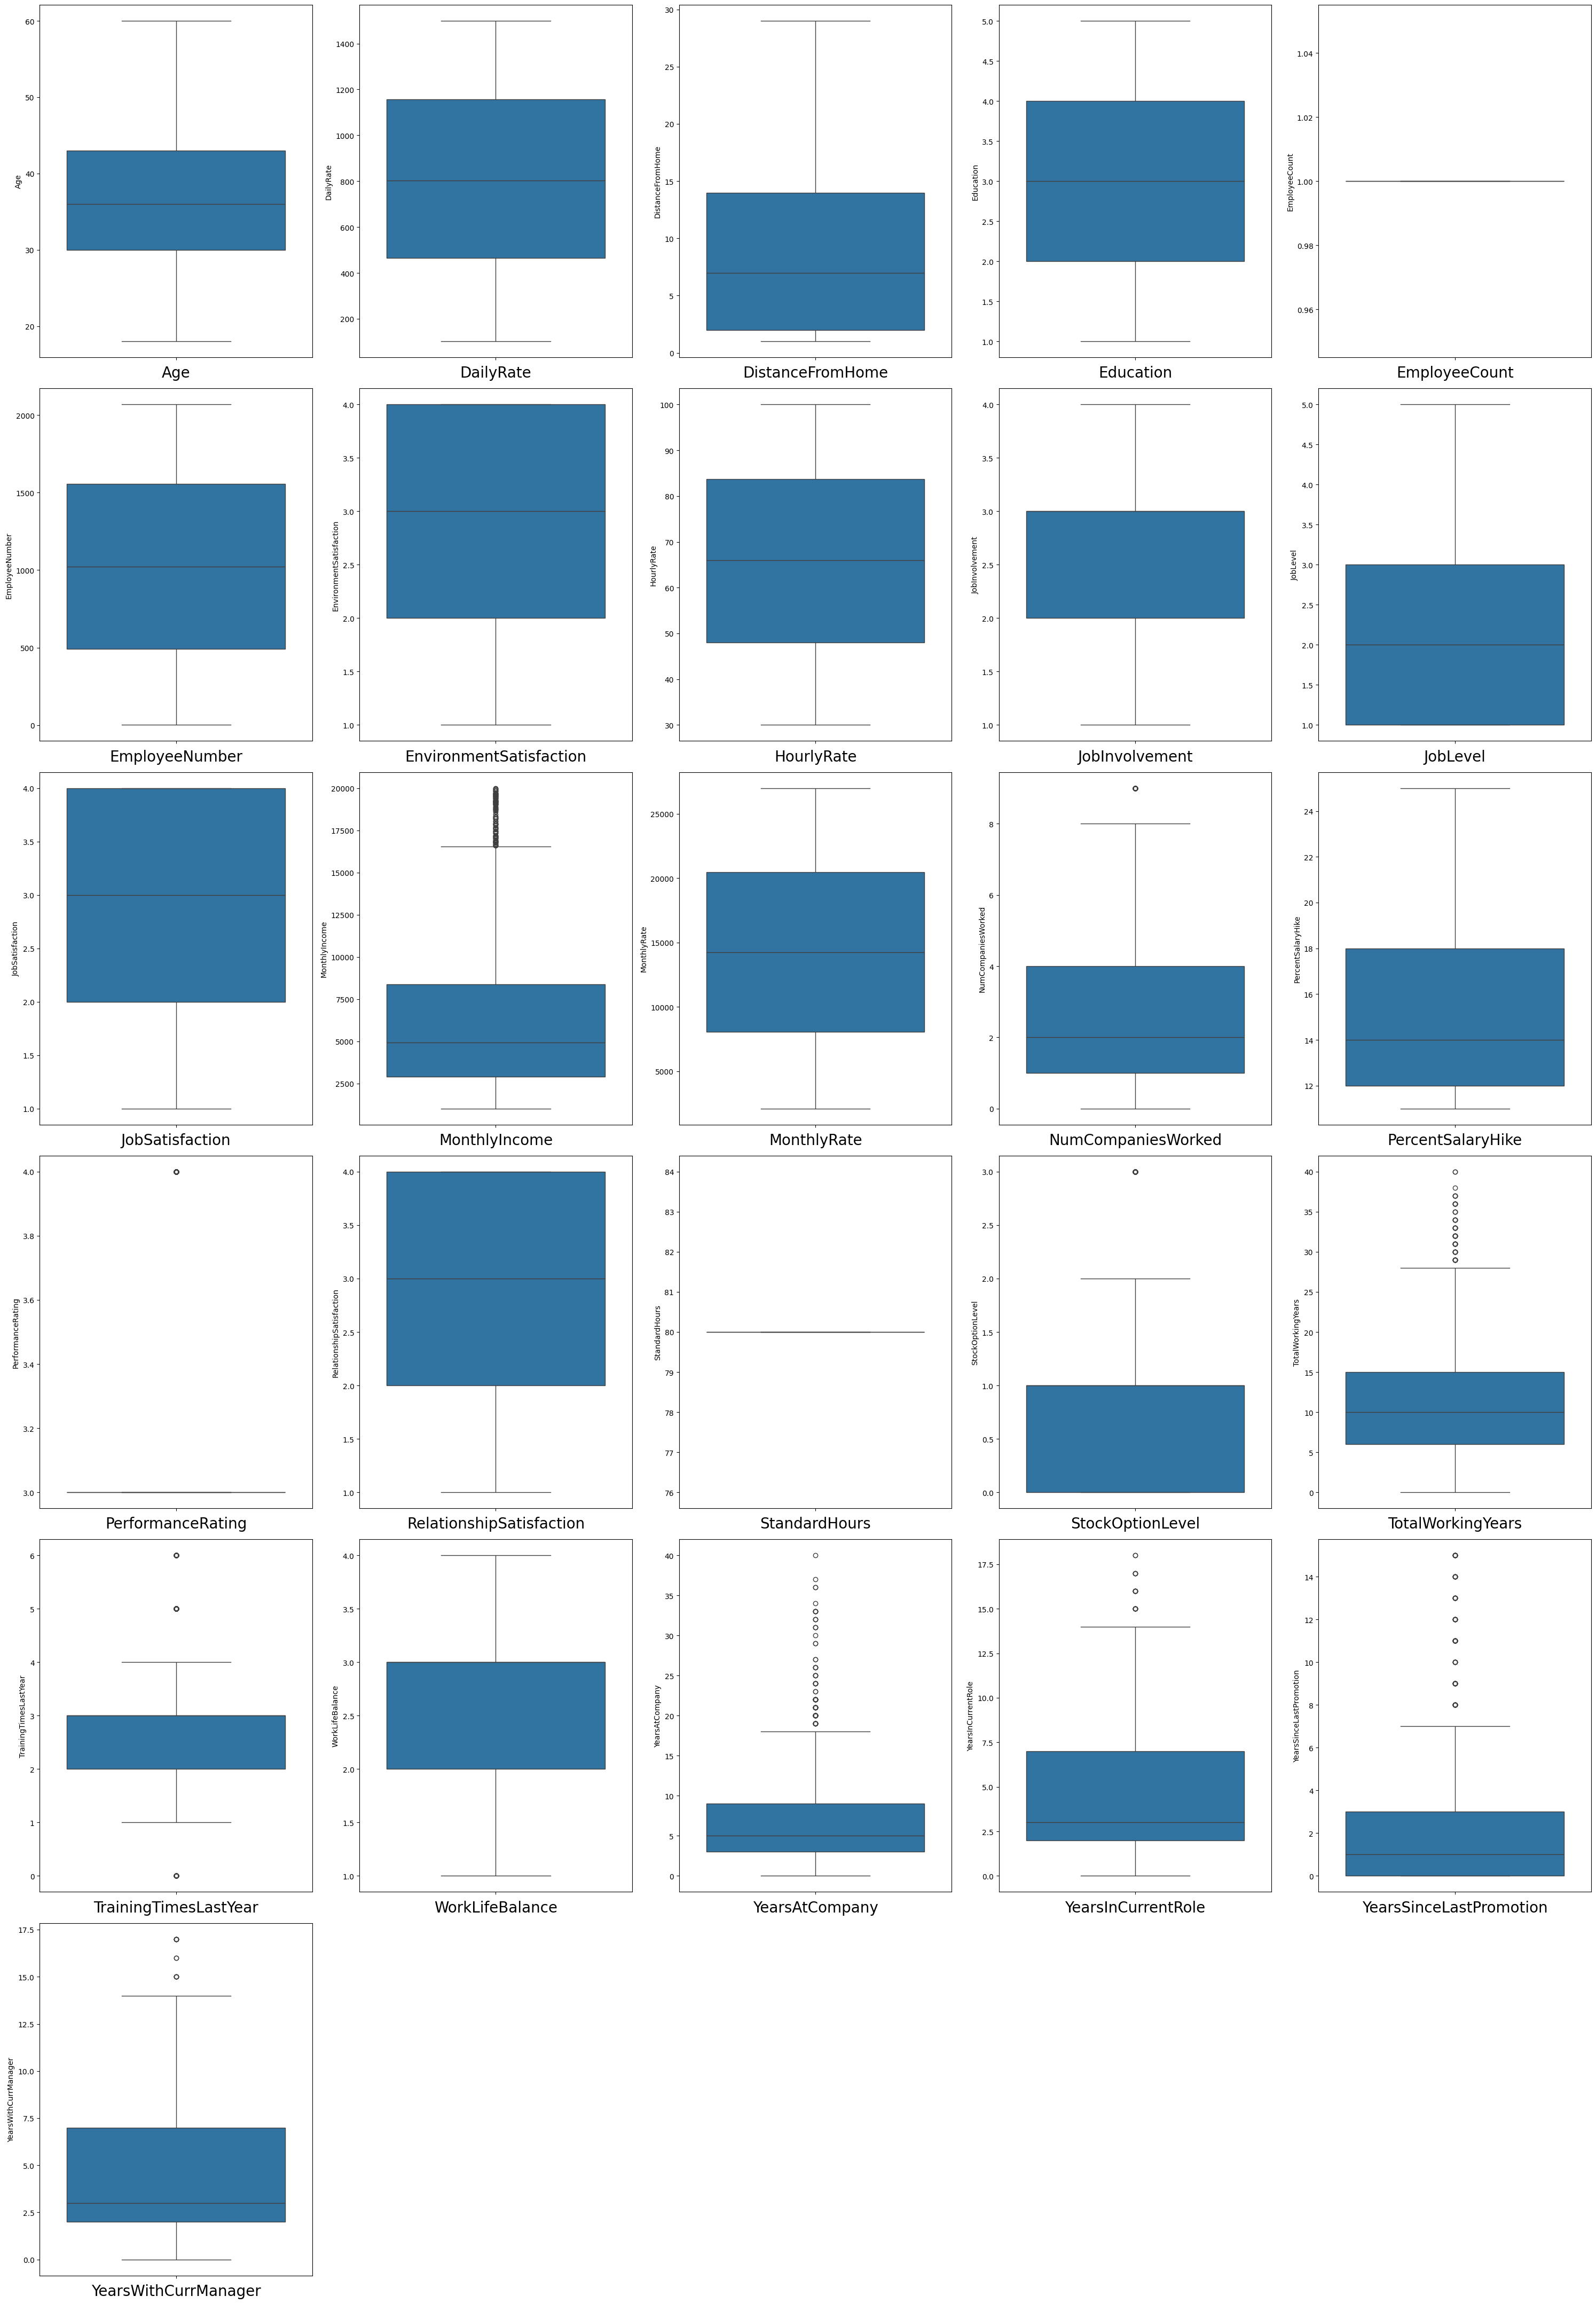

In [52]:
plt.figure(figsize=(30,50))
plot = 1

for column in df_num:
    if plot <= 35:
        ax = plt.subplot(7,5,plot)
        sns.boxplot(df_num[column])
        plt.xlabel(column,fontsize=20)
    
    plot += 1

plt.tight_layout()

In [53]:
from sklearn.utils import resample


majority = df[df['Attrition'] == 'No']
minority = df[df['Attrition'] == 'Yes']


minority_oversampled = resample(minority,
                                replace=True,
                                n_samples=len(majority),
                                random_state=42)


oversampled_data = pd.concat([majority, minority_oversampled])


oversampled_distribution = oversampled_data.Attrition.value_counts()

oversampled_distribution

Attrition
No     1233
Yes    1233
Name: count, dtype: int64

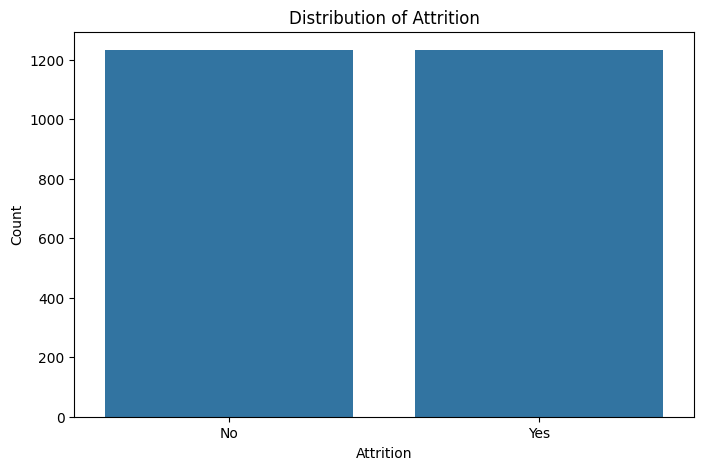

In [54]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Attrition', data=oversampled_data)
plt.title('Distribution of Attrition')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

In [55]:
# encoding categorical columns
oversampled_data = oversampled_data.apply(lambda col: LabelEncoder().fit_transform(col) if col.dtype == 'object' else col)

In [75]:
oversampled_data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,0,1,279,1,8,1,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,0,23,4,4,80,1,10,3,3,10,7,1,7
3,33,0,1,1392,1,3,4,1,1,5,4,0,56,3,1,6,3,1,2909,23159,1,0,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,1,1,40,3,1,2,2,1,3468,16632,9,0,0,12,3,4,80,1,6,3,3,2,2,2,2
5,32,0,1,1005,1,2,2,1,1,8,4,1,79,3,1,2,4,2,3068,11864,0,0,0,13,3,3,80,0,8,2,2,7,7,3,6
6,59,0,2,1324,1,3,3,3,1,10,3,0,81,4,1,2,1,1,2670,9964,4,0,1,20,4,1,80,3,12,3,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,2,1449,2,2,3,2,1,1277,1,0,94,1,5,3,2,2,18824,2493,2,0,1,16,3,1,80,0,26,2,3,24,10,1,11
366,41,1,1,143,2,4,3,2,1,488,1,1,56,3,2,7,2,2,9355,9558,1,0,0,18,3,3,80,0,8,5,3,8,7,7,7
801,50,1,1,959,2,1,4,4,1,1113,4,1,81,3,2,7,3,2,4728,17251,3,0,1,14,3,4,80,0,5,4,3,0,0,0,0
791,35,1,2,1204,2,4,3,5,1,1100,4,1,86,3,3,7,1,2,9582,10333,0,0,1,22,4,1,80,0,9,2,3,8,7,4,7


In [57]:
X_oversampled = oversampled_data.drop('Attrition', axis=1)
y_oversampled = oversampled_data['Attrition']


In [58]:
# Rescaling numerical features
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

X_oversampled = pd.DataFrame(minmax_scaler.fit_transform(X_oversampled), 
                                    columns = minmax_scaler.get_feature_names_out(), 
                                    index = oversampled_data.index)

X_oversampled.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,0.738095,0.5,0.126700,0.5,0.250000,0.00,0.2,0.0,0.000484,0.666667,1.0,0.442857,0.333333,0.25,0.75,0.333333,0.5,0.217009,0.916001,0.111111,0.0,0.0,0.857143,1.0,1.000000,0.0,0.333333,0.25,0.500000,0.666667,0.250,0.388889,0.066667,0.411765
3,0.357143,0.5,0.923407,0.5,0.071429,0.75,0.2,0.0,0.001935,1.000000,0.0,0.371429,0.666667,0.00,0.75,0.666667,0.5,0.100053,0.845814,0.111111,0.0,1.0,0.000000,0.0,0.666667,0.0,0.000000,0.20,0.500000,0.666667,0.200,0.388889,0.200000,0.000000
4,0.214286,1.0,0.350036,0.5,0.035714,0.00,0.6,0.0,0.002903,0.000000,1.0,0.142857,0.666667,0.00,0.25,0.333333,0.5,0.129489,0.583738,1.000000,0.0,0.0,0.071429,0.0,1.000000,0.0,0.333333,0.15,0.500000,0.666667,0.050,0.111111,0.133333,0.117647
5,0.333333,0.5,0.646385,0.5,0.035714,0.25,0.2,0.0,0.003387,1.000000,1.0,0.700000,0.666667,0.00,0.25,1.000000,1.0,0.108425,0.392291,0.000000,0.0,0.0,0.142857,0.0,0.666667,0.0,0.000000,0.20,0.333333,0.333333,0.175,0.388889,0.200000,0.352941
6,0.976190,1.0,0.874732,0.5,0.071429,0.50,0.6,0.0,0.004354,0.666667,0.0,0.728571,1.000000,0.00,0.25,0.000000,0.5,0.087467,0.316001,0.444444,0.0,1.0,0.642857,1.0,0.000000,0.0,1.000000,0.30,0.500000,0.333333,0.025,0.000000,0.000000,0.000000


In [59]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_oversampled, y_oversampled)


feature_importance = rf_model.feature_importances_


features_df = pd.DataFrame({'Feature': X_oversampled.columns, 'Importance': feature_importance})
features_df = features_df.sort_values(by='Importance', ascending=False)

print(features_df.head(10))  

              Feature  Importance
17      MonthlyIncome    0.071640
21           OverTime    0.064725
0                 Age    0.056974
8      EmployeeNumber    0.048785
27  TotalWorkingYears    0.046094
2           DailyRate    0.044762
18        MonthlyRate    0.043965
30     YearsAtCompany    0.042620
11         HourlyRate    0.042181
26   StockOptionLevel    0.041641


In [60]:

X_train, X_test, y_train, y_test = train_test_split(
    X_oversampled, y_oversampled, test_size=0.3, random_state=42)


In [61]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_oversampled, y_oversampled)


KNeighborsClassifier()

In [62]:
y_pred = model.predict(X_test)


In [63]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,y_pred))
print('Accuracy: ',accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.84      0.91       367
           1       0.86      0.98      0.92       373

    accuracy                           0.91       740
   macro avg       0.92      0.91      0.91       740
weighted avg       0.92      0.91      0.91       740

Accuracy:  0.9121621621621622


In [64]:
print('Trainig Score: ',model.score(X_oversampled,y_oversampled))
print('Test Score: ',model.score(X_test,y_test))

Trainig Score:  0.9144363341443633
Test Score:  0.9121621621621622


In [85]:
%%time

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

dct = DecisionTreeClassifier()
dct.fit(X_train, y_train)

y_test_pred = dct.predict(X_test)


print(classification_report(y_test,y_test_pred))
print('Accuracy: ',accuracy_score(y_test,y_test_pred))



              precision    recall  f1-score   support

           0       0.97      0.84      0.90       367
           1       0.86      0.98      0.91       373

    accuracy                           0.91       740
   macro avg       0.92      0.91      0.91       740
weighted avg       0.92      0.91      0.91       740

Accuracy:  0.9081081081081082
CPU times: total: 62.5 ms
Wall time: 44.7 ms


In [87]:
print('Trainig Score: ',dct.score(X_train,y_train))
print('Test Score: ',dct.score(X_test,y_test))

Trainig Score:  1.0
Test Score:  0.9081081081081082


In [67]:
from sklearn.linear_model  import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(X_oversampled,y_oversampled)

y_pred = log_reg.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       367
           1       0.80      0.81      0.80       373

    accuracy                           0.80       740
   macro avg       0.80      0.80      0.80       740
weighted avg       0.80      0.80      0.80       740



In [68]:
print('Trainig Score: ',log_reg.score(X_oversampled,y_oversampled))
print('Test Score: ',log_reg.score(X_test,y_test))

Trainig Score:  0.7818329278183292
Test Score:  0.8013513513513514


In [69]:


rf_model_oversampled = RandomForestClassifier(random_state=42)
rf_model_oversampled.fit(X_train, y_train)


y_pred = rf_model_oversampled.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       367
           1       0.96      0.98      0.97       373

    accuracy                           0.97       740
   macro avg       0.97      0.97      0.97       740
weighted avg       0.97      0.97      0.97       740



In [70]:
print('Trainig Score: ',rf_model_oversampled.score(X_oversampled,y_oversampled))
print('Test Score: ',rf_model_oversampled.score(X_test,y_test))

Trainig Score:  0.9902676399026764
Test Score:  0.9675675675675676


In [82]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(
    n_estimators=50,
    learning_rate=0.05,
    max_depth=8,
    random_state=42
)

gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)
y_prob = gb.predict_proba(X_test)[:, 1]

print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print(classification_report(y_test, y_pred_gb))
print("Accuracy:", accuracy_score(y_test, y_pred_gb))



ROC-AUC: 0.9818103454573346
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       367
           1       0.92      0.98      0.95       373

    accuracy                           0.95       740
   macro avg       0.95      0.95      0.95       740
weighted avg       0.95      0.95      0.95       740

Accuracy: 0.9472972972972973


In [84]:
print('Trainig Score: ',gb.score(X_train,y_train))
print('Test Score: ',gb.score(X_test,y_test))

Trainig Score:  0.9994206257242179
Test Score:  0.9472972972972973


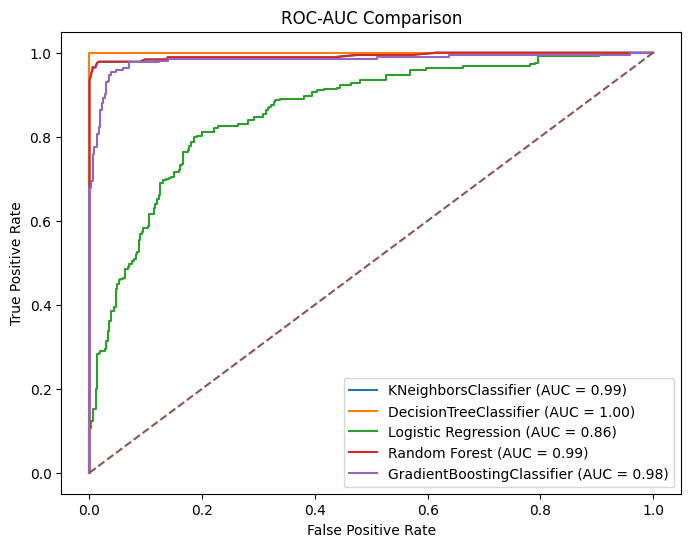

In [83]:
models = {
    "KNeighborsClassifier" : model,
    "DecisionTreeClassifier": dct,
    "Logistic Regression": log_reg,
    "Random Forest": rf_model_oversampled,
    "GradientBoostingClassifier": gb
}

plt.figure(figsize=(8,6))

for name, model in models.items():
    probs = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, probs)
    auc = roc_auc_score(y_test, probs)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Comparison")
plt.legend()
plt.show()


In [72]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [78]:
new_employee = [49,1,279,1,8,1,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,0,23,4,4,80,1,10,3,3,10,7,1,7]

new_df = pd.DataFrame([new_employee])


new_df_scaled = minmax_scaler.transform(new_df)

In [79]:
pred_results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'KNN','DecisionTreeClassifier'],
    'Prediction': [
        log_reg.predict(new_df_scaled)[0],
        rf_model_oversampled.predict(new_df)[0],
        dct.predict(new_df)[0],
        model.predict(new_df_scaled)[0]

    ],
    'Probability': [
        log_reg.predict_proba(new_df_scaled)[0][1],
        rf_model_oversampled.predict_proba(new_df)[0][1],
        dct.predict_proba(new_df)[0][1],
        model.predict_proba(new_df_scaled)[0][1]
    ]
})

pred_results

,Model,Prediction,Probability
0,Logistic Regression,0,0.087381
1,Random Forest,0,0.300000
2,KNN,0,0.000000
3,DecisionTreeClassifier,0,0.050000


In [80]:
new_employee = [50,1,959,2,1,4,4,1,1113,4,1,81,3,2,7,3,2,4728,17251,3,0,1,14,3,4,80,0,5,4,3,0,0,0,0]
new_df = pd.DataFrame([new_employee])


new_df_scaled = minmax_scaler.transform(new_df)

In [81]:
pred_results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'KNN','DecisionTreeClassifier'],
    'Prediction': [
        log_reg.predict(new_df_scaled)[0],
        rf_model_oversampled.predict(new_df)[0],
        dct.predict(new_df)[0],
        model.predict(new_df_scaled)[0]

    ],
    'Probability': [
        log_reg.predict_proba(new_df_scaled)[0][1],
        rf_model_oversampled.predict_proba(new_df)[0][1],
        dct.predict_proba(new_df)[0][1],
        model.predict_proba(new_df_scaled)[0][1]
    ]
})

pred_results


,Model,Prediction,Probability
0,Logistic Regression,1,0.640098
1,Random Forest,0,0.460000
2,KNN,1,1.000000
3,DecisionTreeClassifier,1,0.990000
